# Houston Tunnel Mapping System (EDA)

Perform exploratory data analysis (EDA) on the Houston Tunnel GIS data.

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tunnels = gpd.read_file('tunnels.geojson', engine='pyogrio')
tunnels.head()

,objectid,id,street,name,shape_stle,globalid,created_user,created_date,last_edited_user,last_edited_date,Shape__Length,geometry
0,1,0,,W. Walker,1142.962317,bdaf390d-5d03-4947-a5ad-75c0f20d56c6,HPDGIS,1635262453078,HPDGIS,1635262453078,2051.765223,"MULTILINESTRING ((-95.36945 29.76004, -95.3693..."
1,5,0,,Tunnel Loop,2747.780742,c851fb42-0f7b-437b-b227-1e9a3a2df0cc,HPDGIS,1635262453078,HPDGIS,1635262453078,2747.780742,"LINESTRING (-95.36678 29.75949, -95.36697 29.7..."
2,7,0,,N. Louisiana,1828.483435,ff2d7be6-733f-4620-80c8-656bcb144532,HPDGIS,1635262453078,HPDGIS,1635262453078,4687.772674,"MULTILINESTRING ((-95.36653 29.75943, -95.3664..."
3,8,0,,N. Travis,1001.174595,35cd96dc-a377-4347-8ea8-70c20b3e5bcb,HPDGIS,1635262453078,HPDGIS,1635262453078,3288.383734,"MULTILINESTRING ((-95.36528 29.75872, -95.3650..."
4,12,0,,S. Louisiana,784.170262,8ee89412-1ff2-401a-9455-7f784bbba8f7,HPDGIS,1635262453078,HPDGIS,1635262453078,6093.028881,"MULTILINESTRING ((-95.36781 29.75781, -95.3686..."


In [3]:
tunnels['name'].count()

10

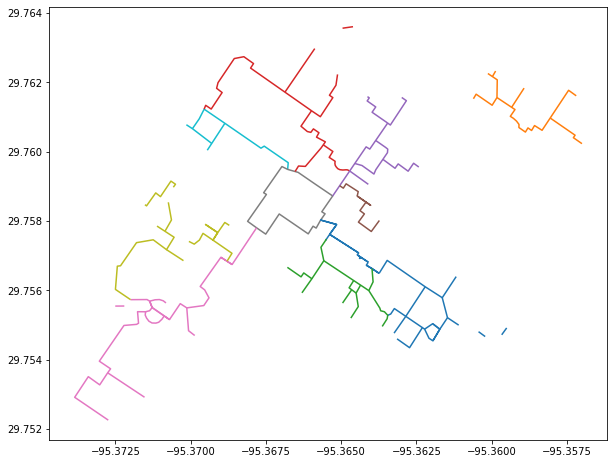

In [4]:
tunnels.plot(figsize=(10,10), column='name')
plt.show()

In [5]:
# Calculate the distance in meters and feet for UTM 15N (EPSG:32615)

meters = tunnels.to_crs('EPSG:32615').length
footage = meters * 3.2808399

tunnels['footage'] = footage

tunnels[['name', 'Shape__Length', 'footage']]

,name,Shape__Length,footage
0,W. Walker,2051.765223,2052.501395
1,Tunnel Loop,2747.780742,2748.764421
2,N. Louisiana,4687.772674,4689.448767
3,N. Travis,3288.383734,3289.555027
4,S. Louisiana,6093.028881,6095.227981
5,W. Dallas,3932.258388,3933.674946
6,E. McKinney,6123.856238,6126.038590
7,Harris County,2838.693581,2839.696459
8,Rusk,1230.002201,1230.440936
9,Lamar,3003.339136,3004.412333


In [6]:
# Calculate total miles of tunnels

tunnels['Shape__Length'].sum() / 5280

6.817591060077902

In [7]:
tunnels['footage'].sum() / 5280

6.820030464736701

In [8]:
buildings = gpd.read_file('buildings-within-tunnels.geojson', engine='pyogrio')
buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   objectid            110 non-null    int64   
 1   geomtype            101 non-null    object  
 2   hgac_parcel_number  108 non-null    object  
 3   buildingname        93 non-null     object  
 4   buildingaddress     86 non-null     object  
 5   globalid            110 non-null    object  
 6   created_user        110 non-null    object  
 7   created_date        110 non-null    int64   
 8   last_edited_user    110 non-null    object  
 9   last_edited_date    110 non-null    int64   
 10  Shape__Area         108 non-null    float64 
 11  Shape__Length       108 non-null    float64 
 12  geometry            108 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(7)
memory usage: 11.3+ KB


In [9]:
buildings[['objectid', 'buildingname', 'Shape__Area']].head()

,objectid,buildingname,Shape__Area
0,1,Harris County Courthouse,27187.992188
1,2,Harris County Family Law Center,25594.003906
2,3,Alley Theatre Garage,25583.984375
3,4,City Hall Annex,38948.023438
4,5,JP Morgan Chase Tower,24907.750000


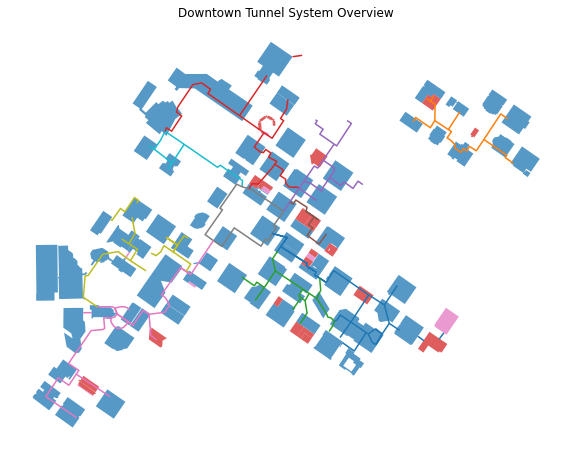

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_axis_off()

buildings.plot(ax=ax, column='geomtype', alpha=0.75)
tunnels.plot(ax=ax, column='name')
plt.title('Downtown Tunnel System Overview')
plt.show()

In [12]:
# Total Square Footage of buildings

buildings['Shape__Area'].sum()

4787804.30078125

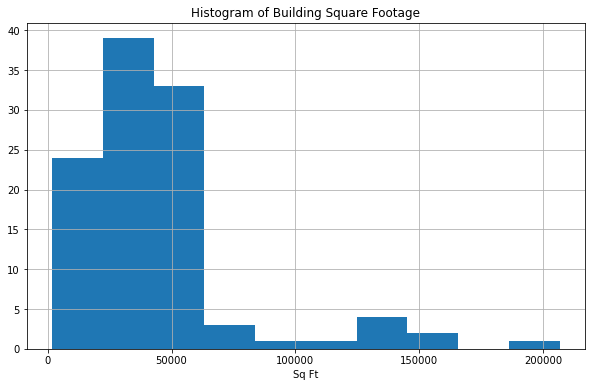

In [15]:
buildings.hist('Shape__Area', figsize=(10,6))
plt.title('Histogram of Building Square Footage')
plt.xlabel('Sq Ft')
plt.show()